## Capstone project 24.1 - Assignment 24

Knowledge Base Quality System (KBQS) Model

**Overview**: Model to predict quality escapes and support risk management at a maintenance service center

### Creating a Classification model

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('risk.csv')

In [29]:
data.head()

,Type,Created,Week,Month,Year,Site,Finding,Repeat Finding,Hangar / Shop,TEAM,Main Applicable Rule (Finding Code),Applicable Rules 2,Main Root Cause,Additional Root Causes 2,Cluster,Risk,Quality escape,Loading,Cert/total
0,QCAR,44134.44122,44,10,2020,Savannah,"In zone 12 of Hangar C, an unlocked cage title...",False,SAV-C,team 1,11.4 - Parts/Material Management & Control,NaN,Complacency – Overconfidence from repeated exp...,NaN,PARTS/MATERIAL MANAGEMENT & CONTROL,3.104565,No,1.616984,0.474039
1,QCAR,44134.45591,44,10,2020,Savannah,"In zone 12 of hangar C, a printed copy of tech...",False,SAV-C,team 1,13 - Current Technical Data,NaN,Lack of Awareness – Failure to see a condition...,NaN,TECHNICAL DATA,2.726081,No,1.616984,0.474039
2,QCAR,44503.30890,45,11,2021,Savannah,​A/C 6006 R/H Galley Sink Leaking. ***See atta...,False,SAV-C,qlty team,9.1 - Work Order Process,9.2 - Standard Documentation,Complacency – Overconfidence from repeated exp...,Lack of Awareness – Failure to see a condition...,RECORD OF MAINTENANCE,2.888232,No,1.427862,0.500000
3,QCAR,44550.64009,52,12,2021,Savannah,Investigation of A/C 73013 Workorder no. SC675...,False,SAV-C,qlty team,9.2 - Standard Documentation,NaN,"Norms – Standard practices, usually undocument...",Complacency – Overconfidence from repeated exp...,RECORD OF MAINTENANCE,2.888232,No,1.209634,0.490000
4,1PY,44791.46200,34,8,2022,Savannah,"Asked for final for CB 24 sealant removal, fou...",NaN,SAV-C,team 2,G4 Incomplete Work,NaN,NaN,NaN,INSPECTION & QUALITY SYSTEM,0.089446,No,0.977916,0.346801


### Cleaning the data - Assignment 20

Using code on Assignment 20

In [41]:
df1 = data.drop(["Hangar / Shop","Site","TEAM","Finding", "Repeat Finding", "Applicable Rules 2", "Main Root Cause", "Additional Root Causes 2"], axis=1) 
df2 = df1.drop(["Created","Week", "Month", "Year"], axis=1) 
df3 = df2.drop(["Main Applicable Rule (Finding Code)"], axis=1) 
df4 = df3.dropna()
df4.sample(5)

,Type,Cluster,Risk,Quality escape,Loading,Cert/total
129,1PY,INSPECTION & QUALITY SYSTEM,0.089446,No,1.812460,0.510000
6,1PY,RECORD OF MAINTENANCE,0.057765,No,0.977916,0.346801
35,1PY,RECORD OF MAINTENANCE,0.057765,No,1.444842,0.380000
178,1PY,INSPECTION & QUALITY SYSTEM,0.089446,No,1.141138,0.568140
86,1PY,INSPECTION & QUALITY SYSTEM,0.089446,No,1.184880,0.470000


Column "Type" needs to be dropped off from the data. Type and quality escape has a high correlation.

In [42]:
df = df4.drop(["Type"], axis=1) 
df.sample(5)

,Cluster,Risk,Quality escape,Loading,Cert/total
104,RECORD OF MAINTENANCE,0.057765,No,1.296060,0.480000
14,INSPECTION & QUALITY SYSTEM,0.089446,No,0.977916,0.346801
9,RECORD OF MAINTENANCE,0.057765,No,0.977916,0.346801
127,RECORD OF MAINTENANCE,0.057765,No,1.388056,0.514912
147,RECORD OF MAINTENANCE,0.057765,No,1.633006,0.516492


### Preparing the data

In [43]:
num_cols = ['Risk', 'Loading', 'Cert/total']
#deleted type_cols = ['Type']
cat_cols = ['Cluster', 'Risk', 'Quality escape']
#no longer needed: df = pd.get_dummies(df, columns = ['Type'])

In [44]:
# Converting categorical columns to numerical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)
df.sample(7)

,Cluster,Risk,Quality escape,Loading,Cert/total
73,5,0,0,1.649113,0.460000
231,5,4,0,1.337504,0.510000
279,1,13,1,1.455548,0.410000
267,9,13,1,1.288590,0.490668
98,5,0,0,1.283031,0.470000
175,5,0,0,1.432404,0.568140
276,0,14,1,1.928229,0.450000


In [45]:
X = df.drop(['Quality escape'], axis=1)
y = df['Quality escape']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Exploring classification models

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, plot_confusion_matrix, mean_squared_error
from sklearn.datasets import load_digits
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings('ignore')

#### Baseline Model

Establish a baseline to compare other models

In [63]:
from sklearn.dummy import DummyClassifier

# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,y_train)

# Check for Model Accuracy
dm_acc_train = dummy_clf.score(X_train,y_train)
dm_acc_test = dummy_clf.score(X_test,y_test)
#dummy classifier which doesn’t learn from the data. 
#Any value close to this result or better implies that our model is improving and is on track
print(f'Dummy model Train score: {dm_acc_train}')
print(f'Dummy model Test score: {dm_acc_test}')

Dummy model Train score: 0.8010204081632653
Dummy model Test score: 0.8


#### Simple Model

Basic model with data using Logistic Regression

In [48]:
from sklearn.metrics import mean_squared_error
lr = LogisticRegression().fit(X_train, y_train)
lr_train_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_test_mse = mean_squared_error(y_test, lr.predict(X_test))
lr_acc_train = lr.score(X_train, y_train)
lr_acc_test = lr.score(X_test, y_test)
#lr_time = lr.cv_results_['mean_fit_time'].mean()
#print(lr_train_mse)
#print(lr_test_mse)
#print(lr_time)
print(f'Simple model Train score: {lr_acc_train}')
print(f'Simple model Test score: {lr_acc_test}')

Simple model Train score: 0.9744897959183674
Simple model Test score: 0.9764705882352941


#### Models Accuracy

In [50]:
#Logistic Regression
pipe_lr = Pipeline([
    ('ss',StandardScaler()),
    ('lr',LogisticRegression(class_weight='balanced'))
])

#fit the model
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
y_pred_train = pipe_lr.predict(X_train)
lrtrain_score = accuracy_score(y_train,y_pred_train)
print('LogisticRegression Train score:',lrtrain_score)
lrtest_score = accuracy_score(y_test,y_pred)
print('LogisticRegression Test score:',lrtest_score)

LogisticRegression Train score: 0.9336734693877551
LogisticRegression Test score: 0.9764705882352941


In [51]:
#GridSearchCV
param_grid = {
    'lr__C':(0.0001,0.01,0.1,1,10,100,1000),
    'lr__solver':('newton-cg', 'lbfgs','liblinear','sag','saga'),
    'lr__class_weight':(None,'balanced')}
lrgrid = GridSearchCV(pipe_lr,param_grid,scoring='accuracy',verbose=2)
#verbose = True, cv=5
#start = time()
lrgrid.fit(X_train,y_train)
lrgrid_preds = lrgrid.predict(X_test)
print(metrics.classification_report(y_test, lrgrid_preds))

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=lbfgs; total time=   0.1s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=0.0001, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[

[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=newton-cg; total time=   0.1s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=newton-cg; total time=   0.0s
[CV] END .lr__C=0.1, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END .lr__C=0.1, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END .lr__C=0.1, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END .lr__C=0.1, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END .lr__C=0.1, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=0.1, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] EN

[CV] END ..lr__C=10, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END ..lr__C=10, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END ..lr__C=10, lr__class_weight=None, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=10, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END lr__C=10, lr__class_weight=None, lr__solver=liblinear; total time=   0.0s
[CV] END ....lr__C=10, lr__class_weight=None, lr__solver=sag; total time=   0.0s
[CV] END ....lr__C=10, lr__class_weight=None, lr__solver=sag; total time=   0.0s
[CV] END ....lr__C=10, lr__class_weight=None, lr__solver=sag; total time=   0.0s
[CV] END ....lr__C=10, lr__class_weight=None, lr__solver=sag; total time=   0.0s
[CV] END ....lr__C

[CV] END .lr__C=1000, lr__class_weight=None, lr__solver=saga; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=newton-cg; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, lr__solver=lbfgs; total time=   0.0s
[CV] END lr__C=1000, lr__class_weight=balanced, l

LogisticRegression Best Params: {'lr__C': 1, 'lr__class_weight': None, 'lr__solver': 'newton-cg'}
LogisticRegression Accuracy: 0.9796153846153846
LogisticRegression Mean Fit Time: 0.008639167376926967


<AxesSubplot:>

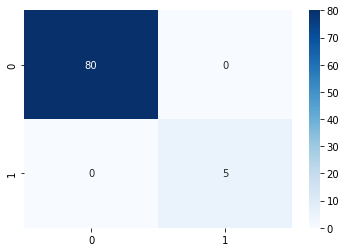

In [52]:
results = lrgrid.cv_results_
lrgrid_score = lrgrid.best_score_
lrgrid_time = lrgrid.cv_results_['mean_fit_time'].mean()
#print(gridcv.cv_results_)
print(f'LogisticRegression Best Params: {lrgrid.best_params_}')
print(f'LogisticRegression Accuracy: {lrgrid_score}')
print(f'LogisticRegression Mean Fit Time: {lrgrid_time}')
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,lrgrid_preds),annot=True,fmt="d",cmap='Blues')

In [53]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
pipe_dt = Pipeline([
    ('ss',StandardScaler()),
    ('dt',DecisionTreeClassifier(random_state=42))
])

#fit the model
pipe_dt.fit(X_train,y_train)
y_pred = pipe_dt.predict(X_test)
y_pred_train = pipe_dt.predict(X_train)
dttrain_score = accuracy_score(y_train,y_pred_train)
print('DecisionTree Train score:',dttrain_score)
dttest_score = accuracy_score(y_test,y_pred)
print('DecisionTree Test score:',dttest_score)

DecisionTree Train score: 1.0
DecisionTree Test score: 1.0


In [54]:
#GridSearchCV
param_grid = {
    'dt__criterion':('gini','entropy','logloss'),
    'dt__splitter':('best','random'),
    'dt__class_weight':(None,'balanced'),
    'dt__max_depth':range(2,15,1)}
dtgrid = GridSearchCV(pipe_dt,param_grid,scoring='accuracy',verbose=1)
#verbose = True, cv=5
#start = time()
dtgrid.fit(X_train,y_train)
dtgrid_preds = dtgrid.predict(X_test)
print(metrics.classification_report(y_test, dtgrid_preds))

Fitting 5 folds for each of 156 candidates, totalling 780 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00         5

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



DecisionTree Best Params: {'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__splitter': 'best'}
DecisionTree Accuracy: 0.9847435897435897
DecisionTree Mean Fit Time: 0.004128545981187086


<AxesSubplot:>

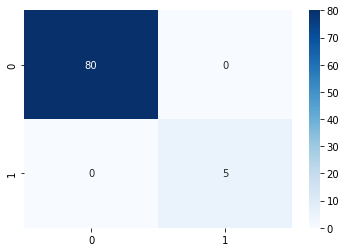

In [55]:
results = dtgrid.cv_results_
dtgrid_score = dtgrid.best_score_
dtgrid_time = dtgrid.cv_results_['mean_fit_time'].mean()
#print(gridcv.cv_results_)
print(f'DecisionTree Best Params: {dtgrid.best_params_}')
print(f'DecisionTree Accuracy: {dtgrid_score}')
print(f'DecisionTree Mean Fit Time: {dtgrid_time}')
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,dtgrid_preds),annot=True,fmt="d",cmap='Blues')

In [56]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([
    ('ss',StandardScaler()),
    ('knn',KNeighborsClassifier())])

#fit the model
pipe_knn.fit(X_train,y_train)
y_pred = pipe_knn.predict(X_test)
y_pred_train = pipe_knn.predict(X_train)
knntrain_score = accuracy_score(y_train,y_pred_train)
print('KNN Classifier Train score:',knntrain_score)
knntest_score = accuracy_score(y_test,y_pred)
print('KNN Classifier Test score:',knntest_score)

KNN Classifier Train score: 0.9642857142857143
KNN Classifier Test score: 0.9764705882352941


In [57]:
#GridSearchCV
param_grid = {
    'knn__n_neighbors': range(2,20,1),
    'knn__weights':('uniform','distance'),
    'knn__algorithm':('auto','ball_tree','kd_tree','brute')}
knngrid = GridSearchCV(pipe_knn,param_grid,scoring='accuracy',verbose=1)
#verbose = True, cv=5
#start = time()
knngrid.fit(X_train,y_train)
knngrid_preds = knngrid.predict(X_test)
print(metrics.classification_report(y_test, knngrid_preds))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.60      0.75         5

    accuracy                           0.98        85
   macro avg       0.99      0.80      0.87        85
weighted avg       0.98      0.98      0.97        85



KNN Classifier Best Params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
KNN Classifier Accuracy: 0.9694871794871794
KNN Classifier Mean Fit Time: 0.004226587547196283


<AxesSubplot:>

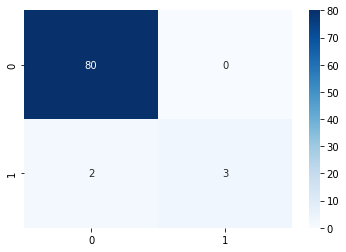

In [58]:
results = knngrid.cv_results_
knngrid_score = knngrid.best_score_
knngrid_time = knngrid.cv_results_['mean_fit_time'].mean()
#print(gridcv.cv_results_)
print(f'KNN Classifier Best Params: {knngrid.best_params_}')
print(f'KNN Classifier Accuracy: {knngrid_score}')
print(f'KNN Classifier Mean Fit Time: {knngrid_time}')
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,knngrid_preds),annot=True,fmt="d",cmap='Blues')

In [59]:
#SVC
from sklearn.svm import SVC
pipe_svc = Pipeline([
    ('ss',StandardScaler()),
    ('svc',SVC())])

#fit the model
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
y_pred_train = pipe_svc.predict(X_train)
svctrain_score = accuracy_score(y_train,y_pred_train)
print('SVC Train score:',svctrain_score)
svctest_score = accuracy_score(y_test,y_pred)
print('SVC Test score:',svctest_score)

SVC Train score: 0.9744897959183674
SVC Test score: 0.9764705882352941


In [60]:
#GridSearchCV
param_grid = {
    'svc__C':(1,5,10),
    'svc__kernel':('linear','poly','rbf','sigmoid','precomputed'),
    'svc__degree':range(1,3),
    'svc__gamma':('scale','auto'),
    'svc__class_weight':(None,'balanced')}
svcgrid = GridSearchCV(pipe_svc,param_grid,scoring='accuracy',verbose=2)
#verbose = True, cv=5
#start = time()
svcgrid.fit(X_train,y_train)
svcgrid_preds = svcgrid.predict(X_test)
print(metrics.classification_report(y_test, svcgrid_preds))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc_

[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=sigmoid; total t

[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=1, svc__class_weight=balanced, svc__degree=2, svc__g

[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=1, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=None, svc__degree=2, sv

[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=5, svc__class_weight=balanced, svc__degree=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=5, svc__class_we

[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=1, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__deg

[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=None, svc__degree=2, svc__gamma=auto, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanc

[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.1s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=sigmoid; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=10, svc__class_weight=balanced, svc__degree=2, svc__gamma=scale, svc__kernel=precomputed; total time=   0.0s
[CV] END svc__C=

SVC Best Params: {'svc__C': 1, 'svc__class_weight': None, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
SVC Accuracy: 0.9744871794871794
SVC Mean Fit Time: 0.005920585791269938


<AxesSubplot:>

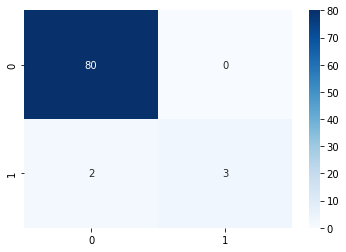

In [61]:
results = svcgrid.cv_results_
svcgrid_score = svcgrid.best_score_
svcgrid_time = svcgrid.cv_results_['mean_fit_time'].mean()
#print(gridcv.cv_results_)
print(f'SVC Best Params: {svcgrid.best_params_}')
print(f'SVC Accuracy: {svcgrid_score}')
print(f'SVC Mean Fit Time: {svcgrid_time}')
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,svcgrid_preds),annot=True,fmt="d",cmap='Blues')

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [62]:
#Results
print(f'Logistic Regression Best Params: {lrgrid.best_params_}')
print(f'Logistic Regression Accuracy: {lrgrid_score}')
print(f'Logistic Regression Mean Fit Time: {lrgrid_time}')
print(f'Decision Tree Best Params: {dtgrid.best_params_}')
print(f'Decision Tree Accuracy: {dtgrid_score}')
print(f'Decision Tree Mean Fit Time: {dtgrid_time}')
print(f'KNN Classifier Best Params: {knngrid.best_params_}')
print(f'KNN Classifier Accuracy: {knngrid_score}')
print(f'KNN Classifier Mean Fit Time: {knngrid_time}')
print(f'SVC Best Params: {svcgrid.best_params_}')
print(f'SVC Accuracy: {svcgrid_score}')
print(f'SVC Mean Fit Time: {svcgrid_time}')

Logistic Regression Best Params: {'lr__C': 1, 'lr__class_weight': None, 'lr__solver': 'newton-cg'}
Logistic Regression Accuracy: 0.9796153846153846
Logistic Regression Mean Fit Time: 0.008639167376926967
Decision Tree Best Params: {'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__splitter': 'best'}
Decision Tree Accuracy: 0.9847435897435897
Decision Tree Mean Fit Time: 0.004128545981187086
KNN Classifier Best Params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
KNN Classifier Accuracy: 0.9694871794871794
KNN Classifier Mean Fit Time: 0.004226587547196283
SVC Best Params: {'svc__C': 1, 'svc__class_weight': None, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
SVC Accuracy: 0.9744871794871794
SVC Mean Fit Time: 0.005920585791269938


In [64]:
print(f'Dummy model Train score: {dm_acc_train}')
print(f'Dummy model Test score: {dm_acc_test}')
print(f'Simple model Train score: {lr_acc_train}')
print(f'Simple model Test score: {lr_acc_test}')
print('LogisticRegression Train score:',lrtrain_score)
print('LogisticRegression Test score:',lrtest_score)
print('DecisionTree Train score:',dttrain_score)
print('DecisionTree Test score:',dttest_score)
print('KNN Classifier Train score:',knntrain_score)
print('KNN Classifier Test score:',knntest_score)
print('SVC Train score:',svctrain_score)
print('SVC Test score:',svctest_score)

Dummy model Train score: 0.8010204081632653
Dummy model Test score: 0.8
Simple model Train score: 0.9744897959183674
Simple model Test score: 0.9764705882352941
LogisticRegression Train score: 0.9336734693877551
LogisticRegression Test score: 0.9764705882352941
DecisionTree Train score: 1.0
DecisionTree Test score: 1.0
KNN Classifier Train score: 0.9642857142857143
KNN Classifier Test score: 0.9764705882352941
SVC Train score: 0.9744897959183674
SVC Test score: 0.9764705882352941


In [65]:
results_df = pd.DataFrame({'Models': ['Dummy Model','Basic Model','Logistic Regression', 'Decision Tree', 'KNN Classifier', 'SVC'],
                         'Best Score': ['-','-',0.910, 0.914, 0.905, 0.908],
                         'Mean Fit Time': ['-','-', 0.299, 0.058, 0.041, 23.740],
                         'Train Accuracy': [0.801, 0.907, 0.855, 1.0, 0.926, 0.920],
                         'Test Accuracy': [0.8, 0.911, 0.852,0.889, 0.902, 0.910]}).set_index('Models')
pd.set_option('display.max_colwidth', None)
results_df  

,Best Score,Mean Fit Time,Train Accuracy,Test Accuracy
Models,,,,
Dummy Model,-,-,0.801,0.800
Basic Model,-,-,0.907,0.911
Logistic Regression,0.91,0.299,0.855,0.852
Decision Tree,0.914,0.058,1.000,0.889
KNN Classifier,0.905,0.041,0.926,0.902
SVC,0.908,23.74,0.920,0.910


### Models overview
Decision tree looks overfitted. KNN classifier performed slightly better than basic model. SVC had slightly better results, but the time was higher than the other models.
KNN will be further improved.

Text(0.5, 1.0, 'Decision Tree')

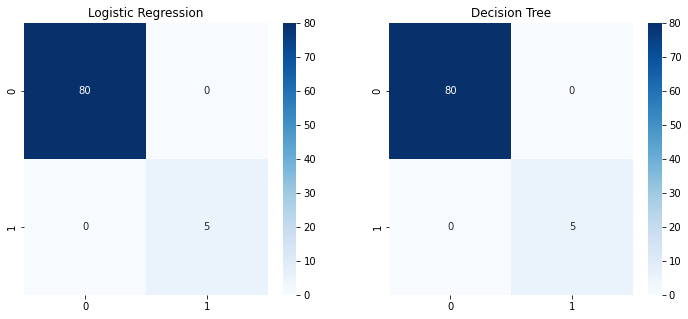

In [66]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test,lrgrid_preds),annot=True,fmt="d",cmap='Blues')
plt.title("Logistic Regression")

plt.subplot(122)
sns.heatmap(confusion_matrix(y_test,dtgrid_preds),annot=True,fmt="d",cmap='Blues')
plt.title("Decision Tree")

Text(0.5, 1.0, 'SVC')

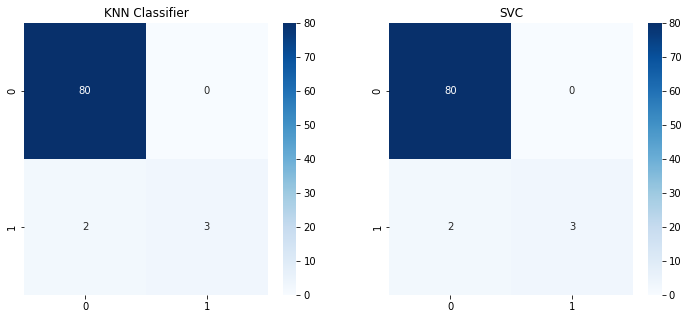

In [67]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test,knngrid_preds),annot=True,fmt="d",cmap='Blues')
plt.title("KNN Classifier")

plt.subplot(122)
sns.heatmap(confusion_matrix(y_test,svcgrid_preds),annot=True,fmt="d",cmap='Blues')
plt.title("SVC")

### Improving the Model

More feature engineering and exploration

Data metrics - Features
The features should not be reduced, since it was already cleaned to keep the basic metrics from the Service Center

Optimizing KNN hyperparameter:
Exploring additional hyperparameters of our models have additional hyperparameters to tune and explore.
Update verbose to True on GridSearchCV 
Test another type of GridSearchCV
Tweek the Number of neighbors in KNN

In [68]:
#Optimizing model GridSearchCV: change verbose - True and cv = 5
param_grid = {
    'knn__n_neighbors': range(2,20,1),
    'knn__weights':('uniform','distance'),
    'knn__algorithm':('auto','ball_tree','kd_tree','brute')}
knngrid1 = GridSearchCV(pipe_knn,param_grid,scoring='accuracy',cv= 5, verbose=True)
#start = time()
knngrid1.fit(X_train,y_train)
knngrid1_preds = knngrid1.predict(X_test)
print(metrics.classification_report(y_test, knngrid1_preds))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.60      0.75         5

    accuracy                           0.98        85
   macro avg       0.99      0.80      0.87        85
weighted avg       0.98      0.98      0.97        85



KNN Classifier Best Params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
KNN Classifier Accuracy: 0.9694871794871794
KNN Classifier Mean Fit Time: 0.00401986903614468


<AxesSubplot:>

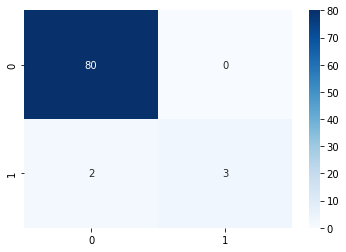

In [69]:
results = knngrid1.cv_results_
knngrid1_score = knngrid1.best_score_
knngrid1_time = knngrid1.cv_results_['mean_fit_time'].mean()
#print(gridcv.cv_results_)
print(f'KNN Classifier Best Params: {knngrid1.best_params_}')
print(f'KNN Classifier Accuracy: {knngrid1_score}')
print(f'KNN Classifier Mean Fit Time: {knngrid1_time}')
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,knngrid1_preds),annot=True,fmt="d",cmap='Blues')

In [72]:
#KNN Classifier
pipe_knn1 = Pipeline([
    ('ss',StandardScaler()),
    ('knn',KNeighborsClassifier(algorithm = 'auto', n_neighbors = 13, weights= 'distance'))])

#fit the model
pipe_knn1.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=13, weights='distance'))])

### Adjusting scores

In [73]:
y_pred_train1 = pipe_knn1.predict(X_train)
y_pred1 = pipe_knn1.predict(X_test)
knntrain_score1 = accuracy_score(y_train,y_pred_train1)
print('KNN Classifier Train score1:',knntrain_score1)
knntest_score1 = accuracy_score(y_test,y_pred1)
print('KNN Classifier Test score1:',knntest_score1)

KNN Classifier Train score1: 1.0
KNN Classifier Test score1: 1.0


<AxesSubplot:>

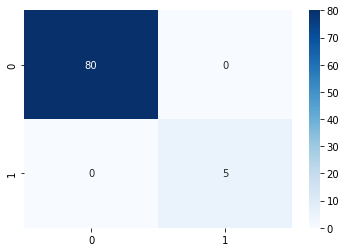

In [74]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt="d",cmap='Blues')